# About the Dataset

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/datasets/).

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.


In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

In [2]:
import matplotlib.pyplot as plt

In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape


(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.


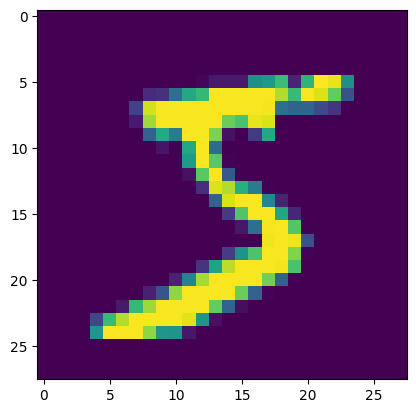

In [5]:
plt.imshow(X_train[0])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.


In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.


In [8]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network


In [9]:
# define classification model
def classification_model():
    # create model

    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test the Network


In [10]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 26s - 14ms/step - accuracy: 0.9437 - loss: 0.1851 - val_accuracy: 0.9692 - val_loss: 0.1031
Epoch 2/10
1875/1875 - 39s - 21ms/step - accuracy: 0.9756 - loss: 0.0775 - val_accuracy: 0.9710 - val_loss: 0.1001
Epoch 3/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9833 - loss: 0.0526 - val_accuracy: 0.9795 - val_loss: 0.0678
Epoch 4/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9870 - loss: 0.0405 - val_accuracy: 0.9768 - val_loss: 0.0746
Epoch 5/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9893 - loss: 0.0321 - val_accuracy: 0.9811 - val_loss: 0.0694
Epoch 6/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9922 - loss: 0.0251 - val_accuracy: 0.9836 - val_loss: 0.0611
Epoch 7/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9923 - loss: 0.0230 - val_accuracy: 0.9823 - val_loss: 0.0771
Epoch 8/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9938 - loss: 0.0203 - val_accuracy: 0.9795 - val_loss: 0.0836
Epoch 9/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9943 - loss: 0.0180 - val_a

In [11]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9785000085830688% 
 Error: 0.021499991416931152


In [12]:
model.save('classification_model.keras')

In [13]:
pretrained_model = keras.saving.load_model('classification_model.keras')

Creating a neural network model with 6 dense layers and compare its accuracy


In [14]:
def classification_model_6layers():
    # create model

    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model_6layers = classification_model_6layers()

# fit the model
model_6layers.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_6layers = model_6layers.evaluate(X_test, y_test, verbose=0)

print('Accuracy_3_layers: {}% \n Accuracy_6_layers: {}'.format(scores[1], scores_6layers[1]))

Epoch 1/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9345 - loss: 0.2175 - val_accuracy: 0.9640 - val_loss: 0.1228
Epoch 2/10
1875/1875 - 41s - 22ms/step - accuracy: 0.9713 - loss: 0.0972 - val_accuracy: 0.9724 - val_loss: 0.0945
Epoch 3/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9792 - loss: 0.0710 - val_accuracy: 0.9768 - val_loss: 0.0850
Epoch 4/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9832 - loss: 0.0568 - val_accuracy: 0.9790 - val_loss: 0.0793
Epoch 5/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9860 - loss: 0.0468 - val_accuracy: 0.9755 - val_loss: 0.0843
Epoch 6/10
1875/1875 - 41s - 22ms/step - accuracy: 0.9884 - loss: 0.0390 - val_accuracy: 0.9807 - val_loss: 0.0690
Epoch 7/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9898 - loss: 0.0349 - val_accuracy: 0.9815 - val_loss: 0.0744
Epoch 8/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9908 - loss: 0.0299 - val_accuracy: 0.9787 - val_loss: 0.0866
Epoch 9/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9926 - loss: 0.0275 - val_a

Now, load the the earlier saved model, train it further for 10 more epochs and check the accuracy


In [15]:
#load the saved model
pretrained_model = keras.saving.load_model('classification_model.keras')

print("Pre-trained model loaded successufully")

# Further train the loaded model
pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_20_epochs = pretrained_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy_10_epochs: {}% \n Accuracy_20_epochs: {}'.format(scores[1], scores_20_epochs[1]))

Pre-trained model loaded successufully
Epoch 1/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9952 - loss: 0.0154 - val_accuracy: 0.9820 - val_loss: 0.0905
Epoch 2/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9952 - loss: 0.0149 - val_accuracy: 0.9833 - val_loss: 0.0901
Epoch 3/10
1875/1875 - 20s - 10ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9820 - val_loss: 0.0978
Epoch 4/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9969 - loss: 0.0103 - val_accuracy: 0.9803 - val_loss: 0.1143
Epoch 5/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9962 - loss: 0.0137 - val_accuracy: 0.9820 - val_loss: 0.0986
Epoch 6/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9834 - val_loss: 0.0889
Epoch 7/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9970 - loss: 0.0107 - val_accuracy: 0.9820 - val_loss: 0.1322
Epoch 8/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9966 - loss: 0.0121 - val_accuracy: 0.9831 - val_loss: 0.1041
Epoch 9/10
1875/1875 - 19s - 10ms/step - 